# Introduction to Chest X-ray Datasets

# Colab setting and google drive mount

▶ Preparation 

0. 개인 google drive 에 "Data" 라는 폴더를 생성해주세요.

1. 공유 폴더 안에 X-ray.zip 파일을 다운로드 받아 압축을 푼 뒤 생성되는 "X-ray" 폴더를 google drive 의 "Data" 폴더 안에 업로드해 주세요.

2. "X-ray" 폴더 내로 들어가서 intro_cxr_datasets.ipynb 파일을 colab 으로 열어주세요. (우클릭 후, 연결앱을 colab 으로 설정)

3. 혹시 drive mount 가 잘 되지 않을 경우, code 와 data 를 개인 컴퓨터에 저장해서 jupyter notebook 으로 실행시키셔도 됩니다.

In [1]:
#mount google drive to read data
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%cd '/content/drive/My Drive/Data/X-ray'

/content/drive/My Drive/Data/X-ray


In [3]:
!ls

CheXpert-v1.0-small  img		       NIH
fundus		     intro_cxr_datasets.ipynb  RSNA_Pneumonia
handling_cxr.ipynb   MIMIC-CXR		       vin


In [4]:
#@title
!ls

CheXpert-v1.0-small  img		       NIH
fundus		     intro_cxr_datasets.ipynb  RSNA_Pneumonia
handling_cxr.ipynb   MIMIC-CXR		       vin


## Open datasets
![CXRdatasets](https://github.com/SNUH-AIeducation/SNUH-AI-Education-for-Clinicians/blob/master/Modality/X-ray/img/CXRdatasets.PNG?raw=1)

**+ SIIM Pneumothrax(https://www.kaggle.com/c/siim-acr-pneumothorax-segmentation/data?select=stage_2_train.csv), COVID-19**

### 1. ChestX-ray8, 14(NIH)
- https://www.nih.gov/news-events/news-releases/nih-clinical-center-provides-one-largest-publicly-available-chest-x-ray-datasets-scientific-community  
- https://openaccess.thecvf.com/content_cvpr_2017/papers/Wang_ChestX-ray8_Hospital-Scale_Chest_CVPR_2017_paper.pdf
![NIH_CVPR](https://github.com/SNUH-AIeducation/SNUH-AI-Education-for-Clinicians/blob/master/Modality/X-ray/img/NIH_CVPR.PNG?raw=1)
- https://www.kaggle.com/nih-chest-xrays/data  
![NIH_Kaggle](https://github.com/SNUH-AIeducation/SNUH-AI-Education-for-Clinicians/blob/master/Modality/X-ray/img/NIH_Kaggle.PNG?raw=1)

In [5]:
import pandas as pd
nih_data = pd.read_csv("./NIH/Data_Entry_2017.csv")

In [ ]:
nih_data

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,0.168,NaN
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,0.168,NaN
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168,NaN
112118,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,0.168,NaN


In [6]:
label_counts = nih_data["Finding Labels"].value_counts()[:15]
label_counts

No Finding                  60361
Infiltration                 9547
Atelectasis                  4215
Effusion                     3955
Nodule                       2705
Pneumothorax                 2194
Mass                         2139
Effusion|Infiltration        1603
Atelectasis|Infiltration     1350
Consolidation                1310
Atelectasis|Effusion         1165
Pleural_Thickening           1126
Cardiomegaly                 1093
Emphysema                     892
Infiltration|Nodule           829
Name: Finding Labels, dtype: int64

In [7]:
from glob import glob
import os
all_image_paths = {os.path.basename(x): x for x in 
                   glob(os.path.join('./NIH', 'images*', '*', '*.png'))}

In [8]:
all_image_paths

{'00000001_000.png': './NIH/images_001/images/00000001_000.png'}

In [9]:
nih_data['path'] = nih_data['Image Index'].map(all_image_paths.get)

In [10]:
nih_data

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,path
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN,./NIH/images_001/images/00000001_000.png
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN,None
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN,None
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN,None
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,0.168,NaN,None
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,0.168,NaN,None
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168,NaN,None
112118,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,0.168,NaN,None


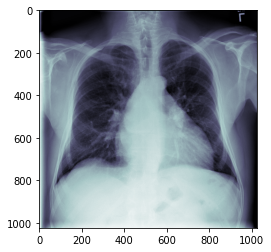

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread(nih_data["path"][0]), cmap=plt.cm.bone)

- Labeling method  
![NIH_label](https://github.com/SNUH-AIeducation/SNUH-AI-Education-for-Clinicians/blob/master/Modality/X-ray/img/NIH_label.PNG?raw=1)
![label_issue1](https://github.com/SNUH-AIeducation/SNUH-AI-Education-for-Clinicians/blob/master/Modality/X-ray/img/label_No_finding.PNG?raw=1)

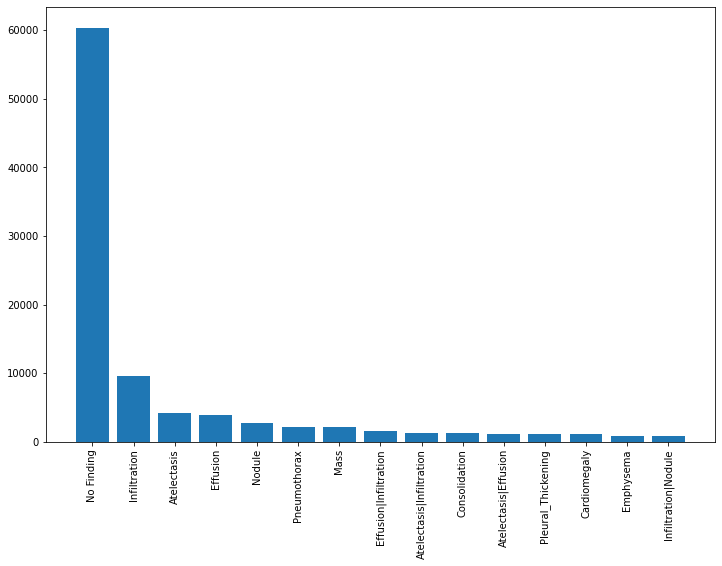

In [ ]:
import numpy as np
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
_ = ax1.set_xticklabels(label_counts.index, rotation = 90)

In [ ]:
from itertools import chain
all_labels = np.unique(list(chain(*nih_data['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        nih_data[c_label] = nih_data['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)

All Labels (15): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


In [ ]:
nih_data

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
112118,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
nih_bbox = pd.read_csv("./NIH/BBox_List_2017.csv")

In [ ]:
nih_bbox

,Image Index,Finding Label,Bbox [x,y,w,h],Unnamed: 6,Unnamed: 7,Unnamed: 8
0,00013118_008.png,Atelectasis,225.084746,547.019217,86.779661,79.186441,NaN,NaN,NaN
1,00014716_007.png,Atelectasis,686.101695,131.543498,185.491525,313.491525,NaN,NaN,NaN
2,00029817_009.png,Atelectasis,221.830508,317.053115,155.118644,216.949153,NaN,NaN,NaN
3,00014687_001.png,Atelectasis,726.237288,494.951420,141.016949,55.322034,NaN,NaN,NaN
4,00017877_001.png,Atelectasis,660.067797,569.780787,200.677966,78.101695,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
979,00029464_015.png,Atelectasis,198.940451,352.900747,615.537778,323.128889,NaN,NaN,NaN
980,00025769_001.png,Atelectasis,701.838229,572.491858,103.537778,63.715556,NaN,NaN,NaN
981,00016837_002.png,Atelectasis,140.913785,658.962969,271.928889,94.435556,NaN,NaN,NaN
982,00020124_003.png,Atelectasis,175.047118,580.456302,244.622222,103.537778,NaN,NaN,NaN


In [ ]:
nih_bbox["Finding Label"].value_counts()

Atelectasis     180
Effusion        153
Cardiomegaly    146
Infiltrate      123
Pneumonia       120
Pneumothorax     98
Mass             85
Nodule           79
Name: Finding Label, dtype: int64

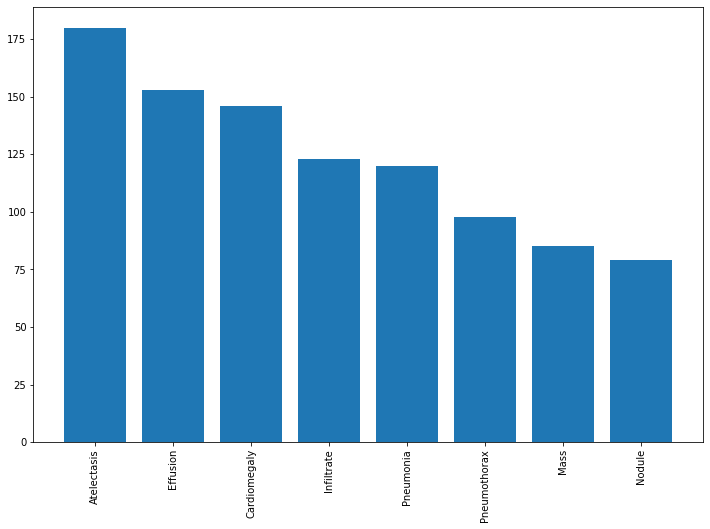

In [ ]:
label_counts_bbox = nih_bbox["Finding Label"].value_counts()
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts_bbox))+0.5, label_counts_bbox)
ax1.set_xticks(np.arange(len(label_counts_bbox))+0.5)
_ = ax1.set_xticklabels(label_counts_bbox.index, rotation = 90)

### 2. CheXpert(Stanford)
- https://stanfordmlgroup.github.io/competitions/chexpert/
![CheXpert](https://github.com/SNUH-AIeducation/SNUH-AI-Education-for-Clinicians/blob/master/Modality/X-ray/img/CheXpert.PNG?raw=1)
![CheXpert_register](https://github.com/SNUH-AIeducation/SNUH-AI-Education-for-Clinicians/blob/master/Modality/X-ray/img/CheXpert_register.PNG?raw=1)
![CheXpert_email](https://github.com/SNUH-AIeducation/SNUH-AI-Education-for-Clinicians/blob/master/Modality/X-ray/img/CheXpert_email.PNG?raw=1)

In [ ]:
chexpert_train = pd.read_csv("./CheXpert-v1.0-small/train.csv")
chexpert_valid = pd.read_csv("./CheXpert-v1.0-small/valid.csv")

In [ ]:
chexpert_train

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223409,CheXpert-v1.0-small/train/patient64537/study2/...,Male,59,Frontal,AP,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,-1.0,0.0,1.0,NaN,NaN,NaN
223410,CheXpert-v1.0-small/train/patient64537/study1/...,Male,59,Frontal,AP,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,0.0,-1.0,NaN,-1.0,NaN,NaN,NaN
223411,CheXpert-v1.0-small/train/patient64538/study1/...,Female,0,Frontal,AP,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223412,CheXpert-v1.0-small/train/patient64539/study1/...,Female,0,Frontal,AP,NaN,NaN,1.0,1.0,NaN,NaN,NaN,-1.0,1.0,0.0,NaN,NaN,NaN,0.0


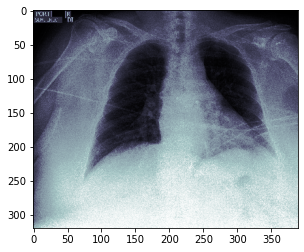

In [ ]:
import matplotlib.image as mpimg
plt.imshow(mpimg.imread(chexpert_train["Path"][0]), cmap=plt.cm.bone)

- Labeling method  
![CheXpert_label](https://github.com/SNUH-AIeducation/SNUH-AI-Education-for-Clinicians/blob/master/Modality/X-ray/img/CheXpert_label.PNG?raw=1)

In [ ]:
chexpert_valid

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/valid/patient64541/study1/...,Male,73,Frontal,AP,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Frontal,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Lateral,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,CheXpert-v1.0-small/valid/patient64543/study1/...,Male,85,Frontal,AP,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CheXpert-v1.0-small/valid/patient64544/study1/...,Female,42,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,CheXpert-v1.0-small/valid/patient64736/study1/...,Female,57,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
230,CheXpert-v1.0-small/valid/patient64737/study1/...,Male,65,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
231,CheXpert-v1.0-small/valid/patient64738/study1/...,Male,71,Frontal,AP,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
232,CheXpert-v1.0-small/valid/patient64739/study1/...,Female,45,Frontal,AP,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3. MIMIC-CXR(MIT)
- https://physionet.org/content/mimic-cxr/2.0.0/  
![MIMIC-CXR](https://github.com/SNUH-AIeducation/SNUH-AI-Education-for-Clinicians/blob/master/Modality/X-ray/img/MIMIC-CXR.PNG?raw=1)
![MIMIC-CXR_files](https://github.com/SNUH-AIeducation/SNUH-AI-Education-for-Clinicians/blob/master/Modality/X-ray/img/MIMIC-CXR_files.PNG?raw=1)
![CITI](https://github.com/SNUH-AIeducation/SNUH-AI-Education-for-Clinicians/blob/master/Modality/X-ray/img/CITI.PNG?raw=1)

- https://physionet.org/content/mimic-cxr-jpg/2.0.0/  
![MIMIC-CXRs](https://github.com/SNUH-AIeducation/SNUH-AI-Education-for-Clinicians/blob/master/Modality/X-ray/img/MIMIC_CXRs.PNG?raw=1)

In [ ]:
mimic_metadata = pd.read_csv("./MIMIC-CXR/mimic-cxr-2.0.0-metadata.csv")

In [ ]:
mimic_metadata

,dicom_id,subject_id,study_id,PerformedProcedureStepDescription,ViewPosition,Rows,Columns,StudyDate,StudyTime,ProcedureCodeSequence_CodeMeaning,ViewCodeSequence_CodeMeaning,PatientOrientationCodeSequence_CodeMeaning
0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,10000032,50414267,CHEST (PA AND LAT),PA,3056,2544,21800506,213014.531,CHEST (PA AND LAT),postero-anterior,Erect
1,174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962,10000032,50414267,CHEST (PA AND LAT),LATERAL,3056,2544,21800506,213014.531,CHEST (PA AND LAT),lateral,Erect
2,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,10000032,53189527,CHEST (PA AND LAT),PA,3056,2544,21800626,165500.312,CHEST (PA AND LAT),postero-anterior,Erect
3,e084de3b-be89b11e-20fe3f9f-9c8d8dfe-4cfd202c,10000032,53189527,CHEST (PA AND LAT),LATERAL,3056,2544,21800626,165500.312,CHEST (PA AND LAT),lateral,Erect
4,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,10000032,53911762,CHEST (PORTABLE AP),AP,2705,2539,21800723,80556.875,CHEST (PORTABLE AP),antero-posterior,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
377105,428e2c18-5721d8f3-35a05001-36f3d080-9053b83c,19999733,57132437,CHEST (PA AND LAT),PA,3056,2544,21520708,224550.171,CHEST (PA AND LAT),postero-anterior,Erect
377106,58c403aa-35ff8bd9-73e39f54-8dc9cc5d-e0ec3fa9,19999733,57132437,CHEST (PA AND LAT),LATERAL,3056,2544,21520708,224550.171,CHEST (PA AND LAT),lateral,Erect
377107,58766883-376a15ce-3b323a28-6af950a0-16b793bd,19999987,55368167,CHEST (PORTABLE AP),AP,2544,3056,21451104,51448.218,CHEST (PORTABLE AP),antero-posterior,Erect
377108,7ba273af-3d290f8d-e28d0ab4-484b7a86-7fc12b08,19999987,58621812,CHEST (PORTABLE AP),AP,3056,2544,21451102,202809.234,CHEST (PORTABLE AP),antero-posterior,Erect


In [ ]:
mimic_metadata["ViewPosition"].value_counts()

AP                147173
PA                 96161
LATERAL            82853
LL                 35133
PA LLD                 4
LAO                    3
RAO                    3
XTABLE LATERAL         2
AP AXIAL               2
AP RLD                 2
AP LLD                 2
PA RLD                 1
SWIMMERS               1
LPO                    1
Name: ViewPosition, dtype: int64

In [ ]:
mimic_chexpert = pd.read_csv("./MIMIC-CXR/mimic-cxr-2.0.0-chexpert.csv")

In [ ]:
mimic_chexpert

,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,10000032,50414267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,10000032,53189527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,10000032,53911762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,10000032,56699142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,10000764,57375967,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227822,19999442,58708861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
227823,19999733,57132437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
227824,19999987,55368167,1.0,-1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN
227825,19999987,58621812,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


![label_issue2](https://github.com/SNUH-AIeducation/SNUH-AI-Education-for-Clinicians/blob/master/Modality/X-ray/img/label_limitation.PNG?raw=1)

- s54336605, s53579054 등 에서 frontal에 lateral이 포함되어있음
- 폐 일부분이 잘려서 다시 찍은 경우도 있음

In [ ]:
mimic_metadata['dicom_id'][0]

'02aa804e-bde0afdd-112c0b34-7bc16630-4e384014'

In [ ]:
!pip install pydicom

In [ ]:
inputdir = "./MIMIC-CXR/files"

import pydicom
dcm1 = pydicom.read_file(inputdir 
                         + "/p" + str(mimic_metadata['subject_id'][0])[:2] 
                         + "/p" + str(mimic_metadata['subject_id'][0]) 
                         + "/s" + str(mimic_metadata['study_id'][0]) 
                         + "/" + mimic_metadata['dicom_id'][0] + '.dcm')
dcm2 = pydicom.read_file(inputdir 
                         + "/p" + str(mimic_metadata['subject_id'][1])[:2] 
                         + "/p" + str(mimic_metadata['subject_id'][1]) 
                         + "/s" + str(mimic_metadata['study_id'][1]) 
                         + "/" + mimic_metadata['dicom_id'][1] + '.dcm')
report1 = open(inputdir 
                         + "/p" + str(mimic_metadata['subject_id'][1])[:2] 
                         + "/p" + str(mimic_metadata['subject_id'][1]) 
                         + "/s" + str(mimic_metadata['study_id'][1]) + '.txt', mode='rt', encoding='utf-8')

In [ ]:
report1.readlines()

['                                 FINAL REPORT\n',
 ' EXAMINATION:  CHEST (PA AND LAT)\n',
 ' \n',
 ' INDICATION:  ___F with new onset ascites  // eval for infection\n',
 ' \n',
 ' TECHNIQUE:  Chest PA and lateral\n',
 ' \n',
 ' COMPARISON:  None.\n',
 ' \n',
 ' FINDINGS: \n',
 ' \n',
 ' There is no focal consolidation, pleural effusion or pneumothorax.  Bilateral\n',
 ' nodular opacities that most likely represent nipple shadows. The\n',
 ' cardiomediastinal silhouette is normal.  Clips project over the left lung,\n',
 ' potentially within the breast. The imaged upper abdomen is unremarkable.\n',
 ' Chronic deformity of the posterior left sixth and seventh ribs are noted.\n',
 ' \n',
 ' IMPRESSION: \n',
 ' \n',
 ' No acute cardiopulmonary process.\n']

In [ ]:
dcm1

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 204
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 2.25.3543748844510614920925352225862149680
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 2.25.55362949469033348352269585565668676650
(0002, 0013) Implementation Version Name         SH: 'MIMIC-CXR v2.0.0'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['DERIVED', 'PRIMARY']
(0008, 0016) SOP Class UID                       UI: Digital X-Ray Image Storage - For Presentation
(0008, 0018) SOP Instance UID                    UI: 2.25.3543748844510614920925352225862149

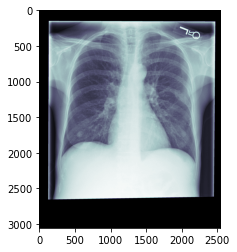

In [ ]:
plt.imshow(dcm1.pixel_array, cmap=plt.cm.bone)

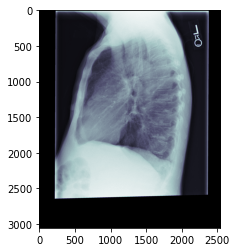

In [ ]:
plt.imshow(dcm2.pixel_array, cmap=plt.cm.bone)

### + PadChest(and COVID-19), SIIM Pneumothorax Segmentation, Pediatric Bone Age, ...

### + RSNA Pneumonia Detection(NIH)
- https://www.rsna.org/education/ai-resources-and-training/ai-image-challenge/RSNA-Pneumonia-Detection-Challenge-2018  
![RSNA_pneumonia](https://github.com/SNUH-AIeducation/SNUH-AI-Education-for-Clinicians/blob/master/Modality/X-ray/img/RSNA_pneumonia.PNG?raw=1)

- https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data  
![RSNA_pneumonia_kaggle](https://github.com/SNUH-AIeducation/SNUH-AI-Education-for-Clinicians/blob/master/Modality/X-ray/img/RSNA_pneumonia_kaggle.PNG?raw=1)